
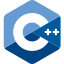
<br>

<div style="text-align:center; font-size:200%;">
 <b>SOLID: OCP (Teil 2)</b>
</div>
<br/>
<div style="text-align:center; font-size:120%;">Dr. Matthias Hölzl</div>
<br/>
<div style="text-align:center;">Coding-Akademie München</div>
<br/>
<!-- 12 SOLID OCP (Teil 2).ipynb -->
<!-- slides/module_500_solid_grasp/topic_340_solic_ocp_part2.cpp -->


## Wiederholung: OCP-Verletzung

<img src="img/movie_v0.svg" alt="MovieV0"
     style="display:block;margin:auto;width:50%"/>


## Lösungsversuch 1: Vererbung

<img src="img/movie_v2.svg" alt="MovieV2"
     style="display:block;margin:auto;width:70%"/>


- OCP ist erfüllt
- Großer Scope der Vererbung
  - Preisberechnung ist das wichtigste an Filmen?
- Nur eindimensionale Klassifikation
- Keine Möglichkeit, Preisschema zu wechseln


## Lösungsversuch 2: Strategie-Muster

<img src="img/movie_v3.svg" alt="MovieV3"
     style="display:block;margin:auto;width:80%"/>


- OCP ist erfüllt
- Vererbung ist auf die Preisberechnung beschränkt
- Mehrdimensionale Klassifikation ist einfach
- Preisschema kann zur Laufzeit gewechselt werden


## Implementierung

In [ ]:
#include <iostream>
#include <memory>
#include <string>
#include <vector>

In [ ]:
class Movie;

In [ ]:
class PricingStrategy {
public:
    virtual ~PricingStrategy() = default;
    virtual double ComputePrice(const Movie&) const = 0;
};

In [ ]:
class RegularPriceStrategy : public PricingStrategy {
public:
    double ComputePrice(const Movie&) const override { return 4.99; }
};

In [ ]:
class ChildrenPriceStrategy : public PricingStrategy {
public:
    double ComputePrice(const Movie&) const override { return 5.99; }
};

In [ ]:
class NewReleasePriceStrategy : public PricingStrategy {
public:
    double ComputePrice(const Movie&) const override { return 6.99; }
};

In [ ]:
class Movie {
public:
    Movie(std::string title, std::unique_ptr<PricingStrategy> pricing_strategy)
        : title_(std::move(title)), pricing_strategy_(std::move(pricing_strategy)) {}

    double ComputePrice() const { return pricing_strategy_->ComputePrice(*this); }

    void PrintInfo() const {
        std::cout << title_ << " costs " << ComputePrice() << std::endl;
    }

private:
    std::string title_;
    std::unique_ptr<PricingStrategy> pricing_strategy_;
};

In [ ]:
std::vector<Movie> movies;
movies.emplace_back("Casablanca", std::make_unique<RegularPriceStrategy>());
movies.emplace_back("Shrek", std::make_unique<ChildrenPriceStrategy>());
movies.emplace_back("Brand New", std::make_unique<NewReleasePriceStrategy>());

In [ ]:
for (const auto& movie : movies) {
    movie.PrintInfo();
}


## Workshop: Berechnung von ÖPNV-Fahrpreisen

In einer modernen Stadt stehen verschiedene öffentliche Verkehrsmittel zur
Verfügung – Busse, U-Bahnen, Züge, Boote, etc. Jedes dieser Verkehrsmittel
hat seine eigene Methode zur Fahrpreisberechnung. Zum Beispiel können
Bustarife auf Pauschalpreisen basieren, U-Bahnen können auf
Entfernungstarifen basieren und Boote können Premiumtarife für
landschaftlich reizvolle Strecken haben.


Sie haben ein rudimentäres Fahrpreisberechnungssystem, das den Fahrpreis
basierend auf dem Verkehrsmittel bestimmt. Leider verstößt dieses System
gegen das OCP, da es ohne Modifikation nicht für die Erweiterung geöffnet
ist. Jedes Mal, wenn ein neues Verkehrsmittel hinzugefügt werden muss, muss
das Kernsystem geändert werden.

Ihre Aufgabe ist es, das System so zu refaktorisieren, dass es dem OCP
entspricht. Genauer gesagt, werden Sie die `switch`-Anweisung aus der
Fahrpreisberechnungslogik entfernen. Das Ziel ist es, das System leicht
erweiterbar zu machen, so dass neue Verkehrsmittel hinzugefügt werden können,
ohne den vorhandenen Code zu ändern.

In [ ]:
#include <iostream>

In [ ]:
enum class TransportType
{
    BUS,
    SUBWAY,
    TRAIN,
    BOAT
};

In [ ]:
class Transport {
public:
    Transport(TransportType type) : type_(type) {}

    double CalculateFare(double distance) {
        switch (type_) {
        case TransportType::BUS: return 2.50; // flat rate
        case TransportType::SUBWAY:
            return 1.50 + (distance * 0.20); // base rate + per km
        case TransportType::TRAIN:
            return 5.00 + (distance * 0.15);    // base rate + per km
        case TransportType::BOAT: return 10.00; // premium rate
        default: return 0.0;
        }
    }

private:
    TransportType type_;
};

In [ ]:
Transport bus(TransportType::BUS);
std::cout << "Bus fare: $" << bus.CalculateFare(10) << "\n";

In [ ]:
Transport subway(TransportType::SUBWAY);
std::cout << "Subway fare: $" << subway.CalculateFare(10) << "\n";

In [ ]:
Transport train(TransportType::TRAIN);
std::cout << "Train fare: $" << train.CalculateFare(10) << "\n";

In [ ]:
Transport boat(TransportType::BOAT);
std::cout << "Boat fare: $" << boat.CalculateFare(10) << "\n";

In [ ]:
#include <iostream>
#include <memory>

In [ ]:
class FareCalculationStrategy {
public:
    FareCalculationStrategy() = default;
    FareCalculationStrategy(const FareCalculationStrategy&) = delete;
    FareCalculationStrategy& operator=(const FareCalculationStrategy&) = delete;
    FareCalculationStrategy(FareCalculationStrategy&&) = delete;
    FareCalculationStrategy& operator=(FareCalculationStrategy&&) = delete;
    virtual ~FareCalculationStrategy() = default;

    virtual double CalculateFare(double distance) = 0;
};

In [ ]:
class BusFare : public FareCalculationStrategy {
public:
    double CalculateFare(double distance) override {
        return 2.50; // flat rate
    }
};

In [ ]:
class SubwayFare : public FareCalculationStrategy {
public:
    double CalculateFare(double distance) override {
        return 1.50 + (distance * 0.20); // base rate + per km
    }
};

In [ ]:
class TrainFare : public FareCalculationStrategy {
public:
    double CalculateFare(double distance) override {
        return 5.00 + (distance * 0.15); // base rate + per km
    }
};

In [ ]:
class BoatFare : public FareCalculationStrategy {
public:
    double CalculateFare(double distance) override {
        return 10.00; // premium rate
    }
};

In [ ]:
class Transport {
public:
    Transport(std::unique_ptr<FareCalculationStrategy> fareStrategy)
        : fareStrategy_{std::move(fareStrategy)} {}

    double ComputeFare(double distance) { return fareStrategy_->CalculateFare(distance); }

private:
    std::unique_ptr<FareCalculationStrategy> fareStrategy_;
};

In [ ]:
Transport bus(std::make_unique<BusFare>());
std::cout << "Bus fare: $" << bus.ComputeFare(10) << "\n";

In [ ]:
Transport subway(std::make_unique<SubwayFare>());
std::cout << "Subway fare: $" << subway.ComputeFare(10) << "\n";

In [ ]:
Transport train(std::make_unique<TrainFare>());
std::cout << "Train fare: $" << train.ComputeFare(10) << "\n";

In [ ]:
Transport boat(std::make_unique<BoatFare>());
std::cout << "Boat fare: $" << boat.ComputeFare(10) << "\n";


## Extra-Workshop: Smart Home Device Control System mit Strategy

In einem früheren Workshop haben wir ein System zur Kontrolle von Smart Home
Devices implementiert.

Lösen Sie das OCP-Problem für dieses System mit dem Strategy-Muster.

In [ ]:
class DeviceStrategy {
public:
    virtual ~DeviceStrategy() = default;
    virtual void Control() = 0;
    virtual void GetStatus() const = 0;
};

In [ ]:
#include <iostream>

In [ ]:
class LightStrategy : public DeviceStrategy {
public:
    void Control() override { std::cout << "Light control\n"; }
    void GetStatus() const override { std::cout << "Light status\n"; }
};

In [ ]:
class ThermostatStrategy : public DeviceStrategy {
public:
    void Control() override { std::cout << "Thermostat control\n"; }
    void GetStatus() const override { std::cout << "Thermostat status\n"; }
};

In [ ]:
class SecurityCameraStrategy : public DeviceStrategy {
public:
    void Control() override { std::cout << "Security camera control\n"; }
    void GetStatus() const override { std::cout << "Security camera status\n"; }
};

In [ ]:
class SmartLockStrategy : public DeviceStrategy {
public:
    void Control() override { std::cout << "Smart lock control\n"; }
    void GetStatus() const override { std::cout << "Smart lock status\n"; }
};

In [ ]:
#include <memory>

In [ ]:
class SmartHomeDevice {
public:
    SmartHomeDevice(std::unique_ptr<DeviceStrategy> strategy)
        : strategy_{std::move(strategy)} {}

    void Control() { strategy_->Control(); }
    void GetStatus() { strategy_->GetStatus(); }

private:
    std::unique_ptr<DeviceStrategy> strategy_;
};

In [ ]:
#include <vector>

In [ ]:
std::vector<SmartHomeDevice> devices;

In [ ]:
devices.emplace_back(std::make_unique<LightStrategy>());
devices.emplace_back(std::make_unique<ThermostatStrategy>());
devices.emplace_back(std::make_unique<SecurityCameraStrategy>());
devices.emplace_back(std::make_unique<SmartLockStrategy>());

In [ ]:
for (auto& device : devices) {
    device.Control();
    device.GetStatus();
}